In [1]:
import numpy as np
import matplotlib.pylab as plt

from helpers import load_dict
from plotting_helpers import add_gridlines, set_x_ticks, add_energy_legends


In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15,
    "font.family": "Helvetica"
})

bigger_font_size=22
column_width = 3.75
square_fig_size=(2*column_width,3/2*column_width)


# Load Data

In [3]:
Ls = np.arange(6,37,6)
scales = [1.,2.,4.]
rates = [0.475,0.25,0.158]
Ts = [0.25,1.00]
mss = ['Square', 'Triangular']

In [4]:
plotting_data = load_dict('./plotting_data/final_energies_data_plotting.pkl')

In [5]:
square_data = load_dict('./../../Square/final_plotting/final_data/final_energy_data.pkl')

small_Ls = np.arange(6,21,2)
large_Ls = np.arange(24,33,4)
square_Ls = np.concatenate((small_Ls,large_Ls))
worst_scale = 0.25
worst_rate = 0.475
best_scale = 4.0
best_rate = 0.25

worst_vscores = []
best_vscores = []
for L in square_Ls:
    worst_energy = square_data['periodic'][f'rate={worst_rate}'][f'scale={worst_scale}'][f'L={L}']['final energy']
    worst_var = square_data['periodic'][f'rate={worst_rate}'][f'scale={worst_scale}'][f'L={L}']['final energy var']
    worst_vscore = L**2 * worst_var / (worst_energy**2)
    worst_vscores.append(worst_vscore)
    best_energy = square_data['periodic'][f'rate={best_rate}'][f'scale={best_scale}'][f'L={L}']['final energy']
    best_var = square_data['periodic'][f'rate={best_rate}'][f'scale={best_scale}'][f'L={L}']['final energy var']
    best_vscore = L**2 * best_var / (best_energy**2)
    best_vscores.append(best_vscore)



In [6]:
rate_markers={0.158:'*',0.25:'H',0.475:'^'}
rate_lines={0.158:':',0.25:'--',0.475:'-'}
rate_alphas={0.475:0.2,0.25:0.5,0.158:0.9}
rate_markersize={0.158:9,0.25:7,0.475:7}

colorscale_sq = plt.get_cmap('plasma')
colorscale_tri = plt.get_cmap('viridis')
shades = np.linspace(0.,0.9,2*len(scales))[::-2]
colors_sq = colorscale_sq(shades)
colors_tri = colorscale_tri(shades)
scale_shades = {'Square':{1.0:colors_sq[-3],2.0:colors_sq[-2],4.0:colors_sq[-1]},
                'Triangular':{1.0:colors_tri[-3],2.0:colors_tri[-2],4.0:colors_tri[-1]}}

V-scores for scale=4.0 and rate=0.158
[0.0433661  0.045765   0.05024034 0.0600129  0.05974883]


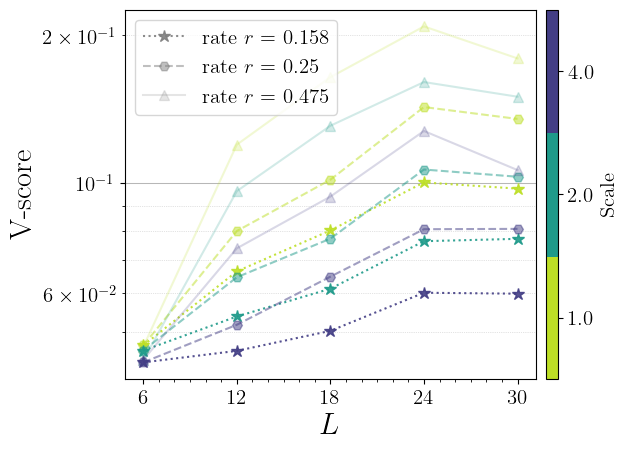

In [7]:
fig, ax = plt.subplots()
both_MS = False
show_square = False

## periodic bc runs
bc_ = 'periodic'
ms_ = 'Triangular'
for scale_ in scales:
    for rate_ in rates[:]:
        T_ = 1.0
        T_ = "{:.2f}".format(T_)

        peri_ens_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['ls']
        peri_vscores = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['vscores']
        peri_vars = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['variances']

        ax.errorbar(peri_ens_ls,peri_vscores,#yerr=peri_ens_errs,
                    fmt='o',color=scale_shades[ms_][scale_],
                    markersize=rate_markersize[rate_],
                    linestyle=rate_lines[rate_],marker=rate_markers[rate_],alpha=rate_alphas[rate_])  

        if (scale_ == 4.0) & (rate_ == 0.158):
            print(f"V-scores for scale={scale_} and rate={rate_}")
            print(peri_vscores)

if both_MS:
        bc_ = 'periodic'
        ms_ = 'Square'
        scale_ = 2.0
        rate_ = 0.475
        T_ = "{:.2f}".format(1.00)

        sqMS_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['ls']
        sqMS = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['vscores']

        ax.errorbar(sqMS_ls,sqMS,
                    fmt='o',color=scale_shades[ms_][scale_],
                    linestyle=rate_lines[rate_],marker=rate_markers[rate_],alpha=rate_alphas[rate_])  

if show_square:
    colorscale = plt.get_cmap('plasma')
    shades = np.linspace(0.,0.9,len(scales)+1)[::-1][:-1]
    colors = colorscale(shades)
    markers = {0.475:'s',0.25:'8'}
    markersizes = {0.475:6,0.25:8}
    alphas = {0.475:0.5,0.25:1.0}
    linestyles= {0.475:'--',0.25:'-'}
    rate_sq = 0.475
    scale_sq = 0
    ax.errorbar(square_Ls,worst_vscores,marker=markers[rate_sq],ms=8,fmt='o',linestyle=linestyles[rate_sq],alpha=alphas[rate_sq],
                    mfc=colors[scale_sq],mec=colors[scale_sq],c=colors[scale_sq])
     

# #6x6 refs
# ax.hlines(0.31230782005649316,6,30,color='k',)
# ax.hlines(0.03939956632528572,6,30,color='k',linestyle='--')
# #12x12 refs
# ax.hlines(0.3048990817330671,6,30,color='k',alpha=0.5)
# ax.hlines(0.1620067611731379,6,30,color='k',linestyle='--',alpha=0.5)
# ax.hlines(0.0629860837877343,6,30,color='k',linestyle=':',alpha=0.5)


ax.set_xlabel(r'$L$',fontsize=bigger_font_size)
ax.set_ylabel(r'V-score',fontsize=bigger_font_size)
ax.set_yscale('log')

add_gridlines(axes='y')
set_x_ticks(ax)
add_energy_legends(show_runs=True,both_MS=both_MS)

filename = 'vscores_peri'
plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

# References

6x6

In [17]:
N = 36
en = -70.7915/(4*N)
var = 43.4753/(4*N)**2
rbm = N * var / (en**2)
print(rbm)

0.31230782005649316


In [18]:
N = 36
en = -80.36672248793934/(4*N)
var = 7.068731007373572/(4*N)**2
dmrg = N * var / (en**2)
print(dmrg)

0.03939956632528572


12x12

In [19]:
N = 144
en = -314.632/(4*N)
var = 43.3/(4*N)**2
best12 = N * var / (en**2)
print(best12)

0.0629860837877343


In [20]:
N = 144
en = -299.46304457007847632/(4*N)
var = 100.89209006595773/(4*N)**2
dmrg = N * var / (en**2)
print(dmrg)

0.1620067611731379


In [21]:
N = 144
en = -282.04227/(4*N)
var = 168.431/(4*N)**2
rbm = N * var / (en**2)
print(rbm)

0.3048990817330671
